In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
result_2014 = pd.read_csv("c:/code/RPC11_Input_For_Participants/datasets/constituency_wise_results_2014.csv")
result_2019 = pd.read_csv("c:/code/RPC11_Input_For_Participants/datasets/constituency_wise_results_2019.csv")
dim_state = pd.read_csv("c:/code/RPC11_Input_For_Participants/datasets/dim_states_codes.csv")


In [3]:
result_2014.describe()

,age,general_votes,postal_votes,total_votes,total_electors
count,7845.000000,8355.000000,8355.000000,8355.000000,8.355000e+03
mean,47.135883,62132.985398,107.407660,62240.393058,1.574132e+06
std,11.902487,140261.650370,436.090305,140535.827087,2.711797e+05
min,25.000000,105.000000,0.000000,105.000000,4.992200e+04
25%,38.000000,1708.000000,0.000000,1708.500000,1.446478e+06
50%,46.000000,4350.000000,1.000000,4354.000000,1.578125e+06
75%,56.000000,14881.000000,13.000000,14886.000000,1.718414e+06
max,93.000000,859973.000000,6792.000000,863358.000000,3.183083e+06


In [4]:
result_2019.describe()

,age,general_votes,postal_votes,total_votes,total_electors
count,8054.000000,8.597000e+03,8597.000000,8.597000e+03,8.597000e+03
mean,47.065185,7.117290e+04,267.469699,7.144037e+04,1.705181e+06
std,12.140434,1.735669e+05,929.319680,1.742342e+05,2.969405e+05
min,24.000000,8.400000e+01,0.000000,8.400000e+01,5.518900e+04
25%,38.000000,1.315000e+03,1.000000,1.317000e+03,1.553385e+06
50%,46.000000,3.341000e+03,4.000000,3.350000e+03,1.703279e+06
75%,56.000000,1.239100e+04,36.000000,1.242100e+04,1.856791e+06
max,90.000000,1.066824e+06,19367.000000,1.068569e+06,3.150313e+06


In [5]:
result_2014.head(5)

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282


List top 5/ bottom 5 constituencies of 2014 and 2019 in terms of voter turnout ratio?

<Figure size 1200x800 with 0 Axes>

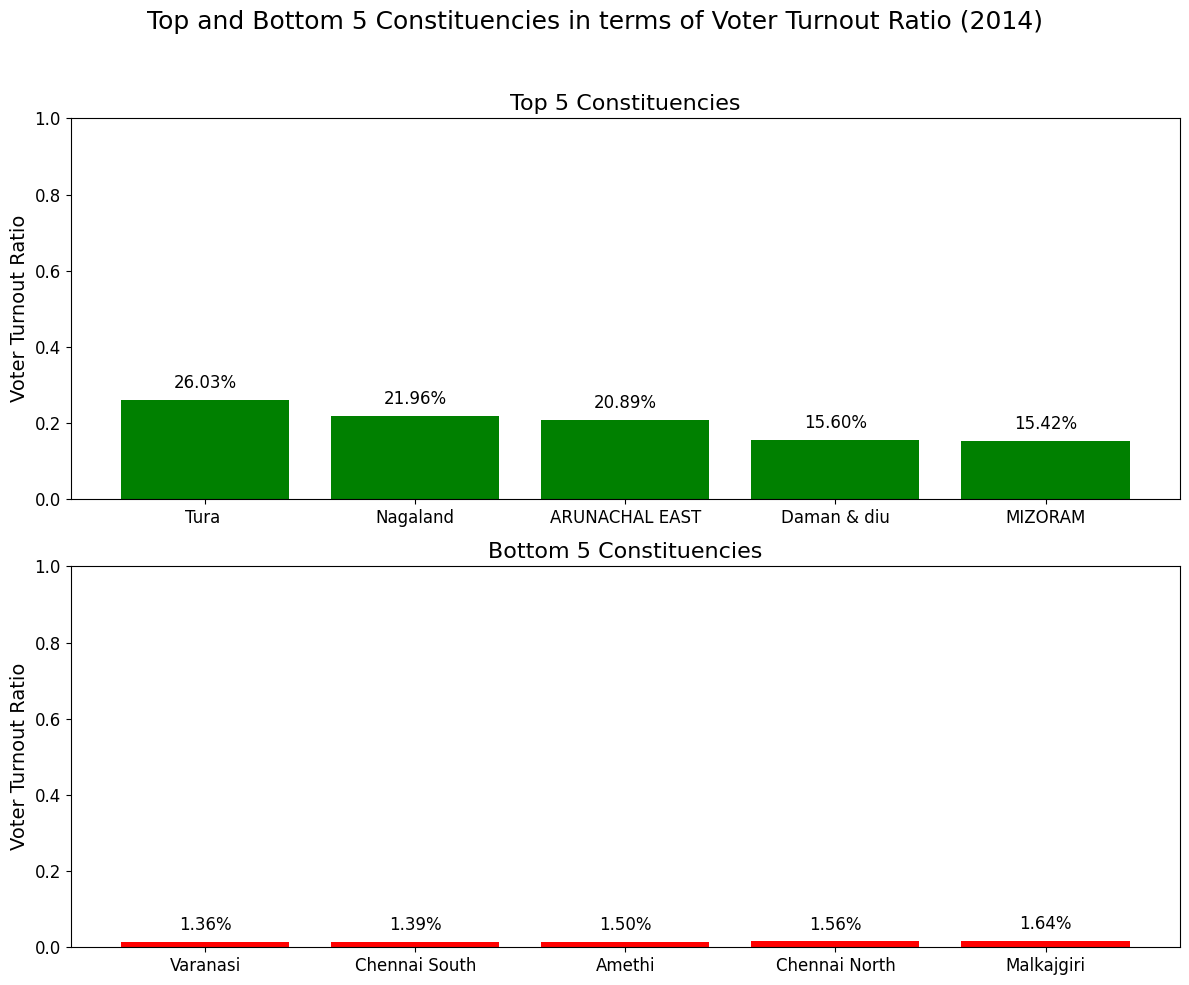

<Figure size 1200x800 with 0 Axes>

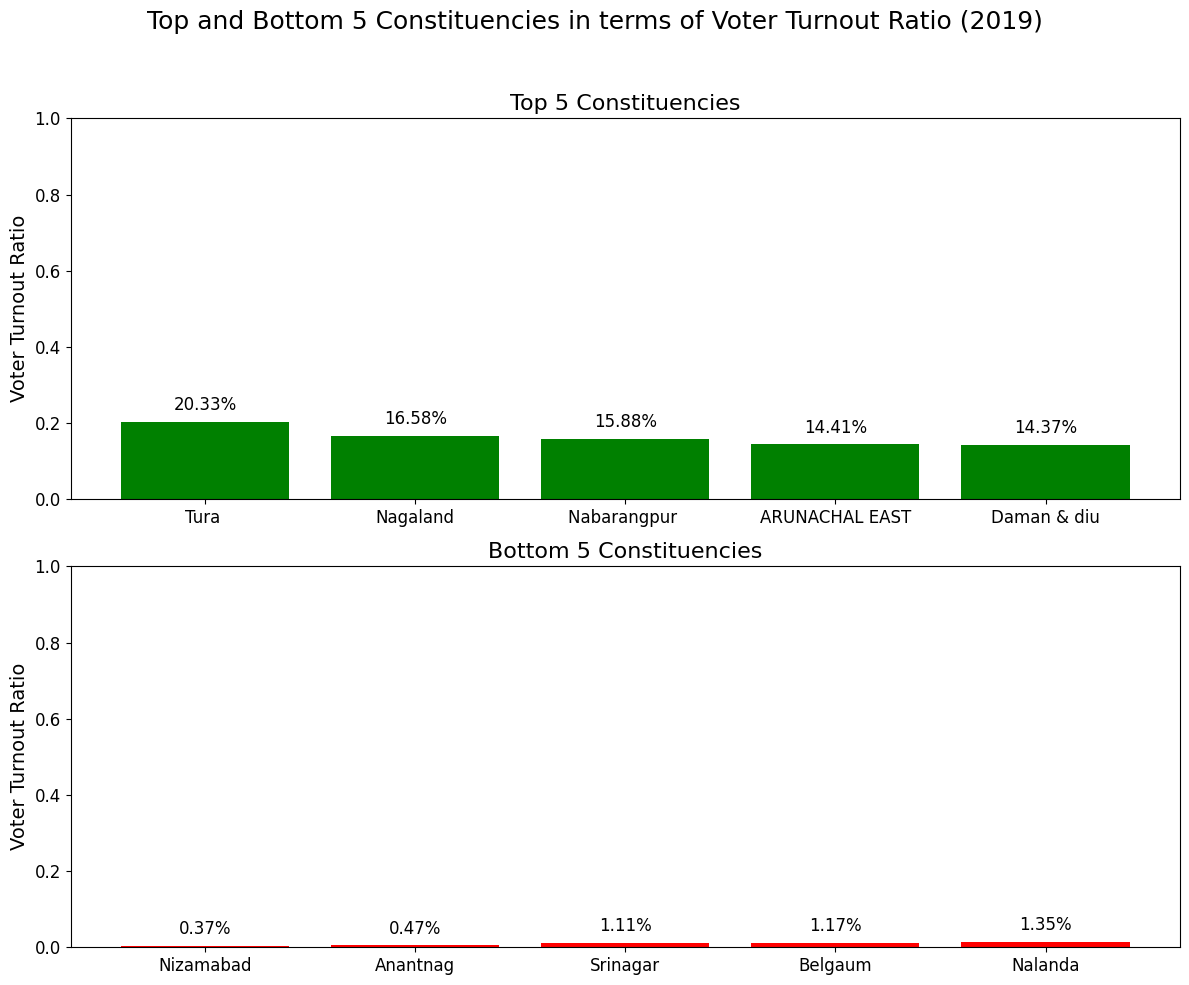

In [6]:
result_2014["voter_turnout_count"]=result_2014["total_votes"]/result_2014["total_electors"]
result_2019["voter_turnout_count"]=result_2019["total_votes"]/result_2019["total_electors"]

def top_bottom_5 (df):
    voter_turnout_by_pc_name = df.groupby('pc_name')['voter_turnout_count'].mean().reset_index()
    top_pc_names = voter_turnout_by_pc_name.sort_values(by= 'voter_turnout_count', ascending =False).head(5)
    bottom_pc_names = voter_turnout_by_pc_name.sort_values(by='voter_turnout_count',ascending =True).head(5)
    return top_pc_names,bottom_pc_names

top_2014,bottom_2014 = top_bottom_5(result_2014)
top_2019,bottom_2019 = top_bottom_5(result_2019)


def plot_voter_turnout(top, bottom, year):
    plt.figure(figsize=(12, 8))  # Adjusted figure size for better visibility
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))  # Increased the figure size
    
    fig.suptitle(f'Top and Bottom 5 Constituencies in terms of Voter Turnout Ratio ({year})', fontsize=18)

    # Top 5
    axes[0].bar(top['pc_name'], top['voter_turnout_count'], color='green')
    axes[0].set_title('Top 5 Constituencies', fontsize=16)
    axes[0].set_ylabel('Voter Turnout Ratio', fontsize=14)
    axes[0].set_ylim(0, 1)
    axes[0].tick_params(axis='both', labelsize=12)
    for i in axes[0].patches:
        axes[0].text(i.get_x() + i.get_width() / 2, i.get_height() + 0.02, f'{i.get_height():.2%}', ha='center', va='bottom', fontsize=12)

    # Bottom 5
    axes[1].bar(bottom['pc_name'], bottom['voter_turnout_count'], color='red')
    axes[1].set_title('Bottom 5 Constituencies', fontsize=16)
    axes[1].set_ylabel('Voter Turnout Ratio', fontsize=14)
    axes[1].set_ylim(0, 1)
    axes[1].tick_params(axis='both', labelsize=12)
    for i in axes[1].patches:
        axes[1].text(i.get_x() + i.get_width() / 2, i.get_height() + 0.02, f'{i.get_height():.2%}', ha='center', va='bottom', fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusted the layout to fit the title better
    plt.show()
plot_voter_turnout(top_2014,bottom_2014,'2014')
plot_voter_turnout(top_2019,bottom_2019,'2019')

list top 5 / bottom 5 states of 2014 and 2019 in terms of voter turnout ratio?

<Figure size 1200x800 with 0 Axes>

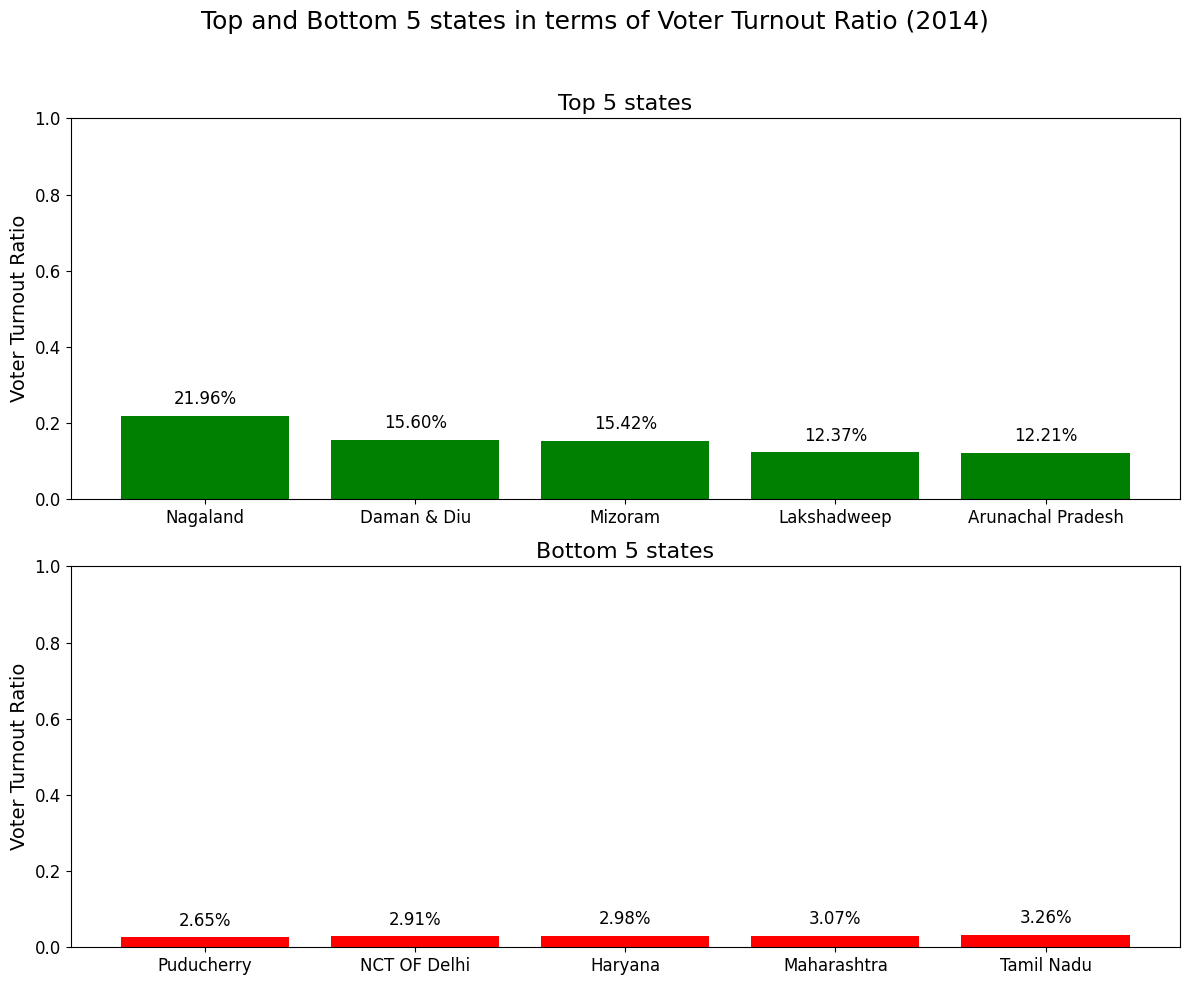

<Figure size 1200x800 with 0 Axes>

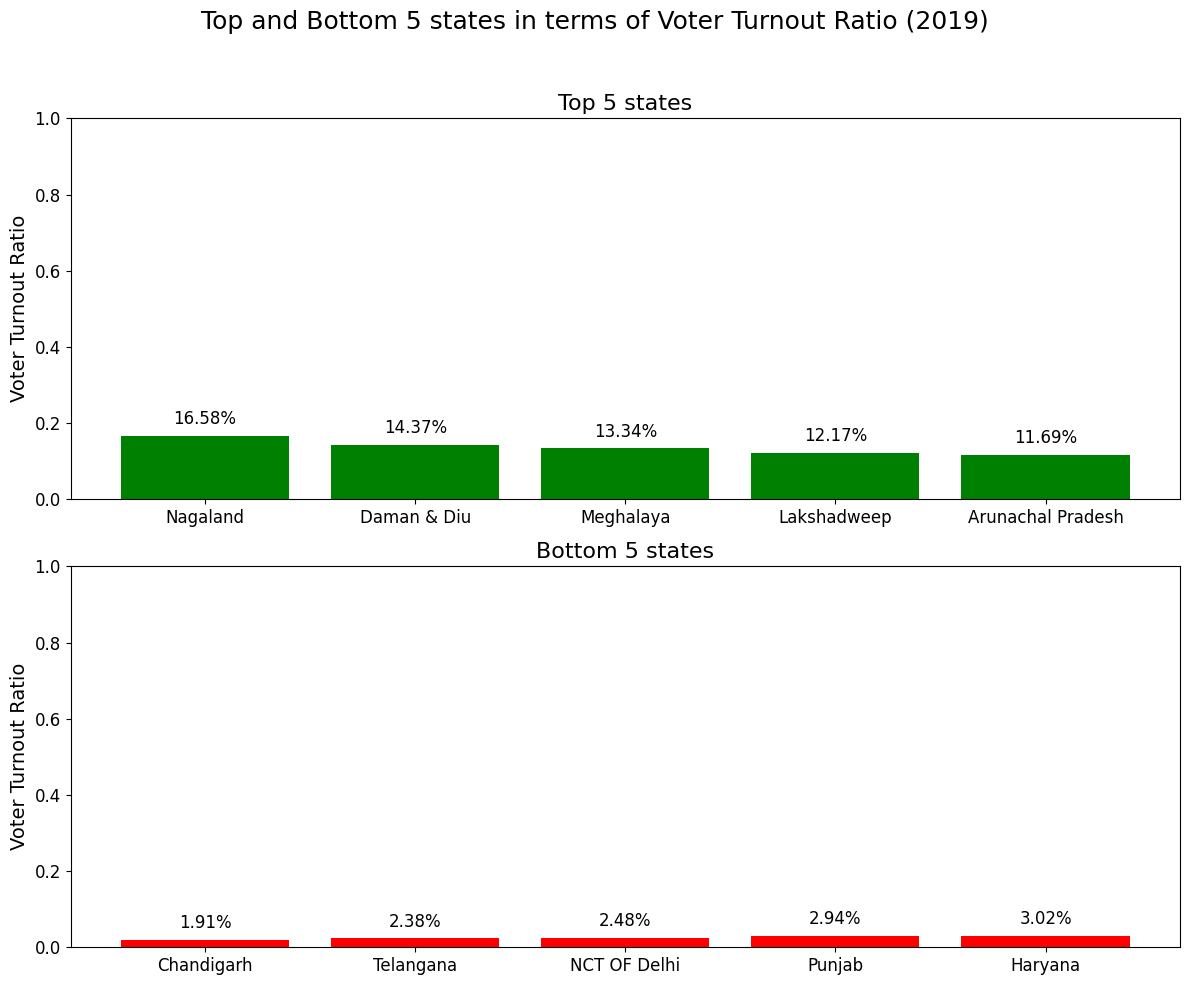

In [7]:
result_2014["voter_turnout_count"]=result_2014["total_votes"]/result_2014["total_electors"]
result_2019["voter_turnout_count"]=result_2019["total_votes"]/result_2019["total_electors"]

def top_bottom_5 (df):
    voter_turnout_by_pc_name = df.groupby('state')['voter_turnout_count'].mean().reset_index()
    top_pc_names = voter_turnout_by_pc_name.sort_values(by= 'voter_turnout_count', ascending =False).head(5)
    bottom_pc_names = voter_turnout_by_pc_name.sort_values(by='voter_turnout_count',ascending =True).head(5)
    return top_pc_names,bottom_pc_names

top_2014,bottom_2014 = top_bottom_5(result_2014)
top_2019,bottom_2019 = top_bottom_5(result_2019)


def plot_voter_turnout(top, bottom, year):
    plt.figure(figsize=(12, 8))  # Adjusted figure size for better visibility
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))  # Increased the figure size
    
    fig.suptitle(f'Top and Bottom 5 states in terms of Voter Turnout Ratio ({year})', fontsize=18)

    # Top 5
    axes[0].bar(top['state'], top['voter_turnout_count'], color='green')
    axes[0].set_title('Top 5 states', fontsize=16)
    axes[0].set_ylabel('Voter Turnout Ratio', fontsize=14)
    axes[0].set_ylim(0, 1)
    axes[0].tick_params(axis='both', labelsize=12)
    for i in axes[0].patches:
        axes[0].text(i.get_x() + i.get_width() / 2, i.get_height() + 0.02, f'{i.get_height():.2%}', ha='center', va='bottom', fontsize=12)

    # Bottom 5
    axes[1].bar(bottom['state'], bottom['voter_turnout_count'], color='red')
    axes[1].set_title('Bottom 5 states', fontsize=16)
    axes[1].set_ylabel('Voter Turnout Ratio', fontsize=14)
    axes[1].set_ylim(0, 1)
    axes[1].tick_params(axis='both', labelsize=12)
    for i in axes[1].patches:
        axes[1].text(i.get_x() + i.get_width() / 2, i.get_height() + 0.02, f'{i.get_height():.2%}', ha='center', va='bottom', fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjusted the layout to fit the title better
    plt.show()
plot_voter_turnout(top_2014,bottom_2014,'2014')
plot_voter_turnout(top_2019,bottom_2019,'2019')

Which constituencies have elected the same party for two consecutive elections rank them by % votes to that winning party in 2019

In [8]:
result_2014.columns

Index(['state', 'pc_name', 'candidate', 'sex', 'age', 'category', 'party',
       'party_symbol', 'general_votes', 'postal_votes', 'total_votes',
       'total_electors', 'voter_turnout_count'],
      dtype='object')

In [9]:
result_2019.columns

Index(['state', 'pc_name', 'candidate', 'sex', 'age', 'category', 'party',
       'party_symbol', 'general_votes', 'postal_votes', 'total_votes',
       'total_electors', 'voter_turnout_count'],
      dtype='object')

              pc_name party_2014  total_votes_2014  total_electors_2014  \
187          Hamirpur        BJP            901919              1247699   
299       Maharajganj        BJP            792295              1642068   
500           Wayanad        INC            377035              1249420   
185       HOSHANGABAD        BJP            669128              1568206   
243            Kangra        BJP            456163              1258601   
..                ...        ...               ...                  ...   
421  Sant Kabir Nagar        BJP            348892              1904315   
287          Ludhiana        INC            300459              1561201   
263        Kishanganj        INC            493461              1438990   
256         Kaushambi        BJP            331724              1738509   
425       Secundrabad        BJP            438271              1893741   

    party_2019  total_votes_2019  total_electors_2019  percentage_votes_2019  
187        BJP      

C:\Users\madhan\AppData\Local\Temp\ipykernel_16188\4199272470.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_top_party['percentage_votes_2019'] = (same_top_party['total_votes_2019'] / same_top_party['total_electors_2019']) * 100


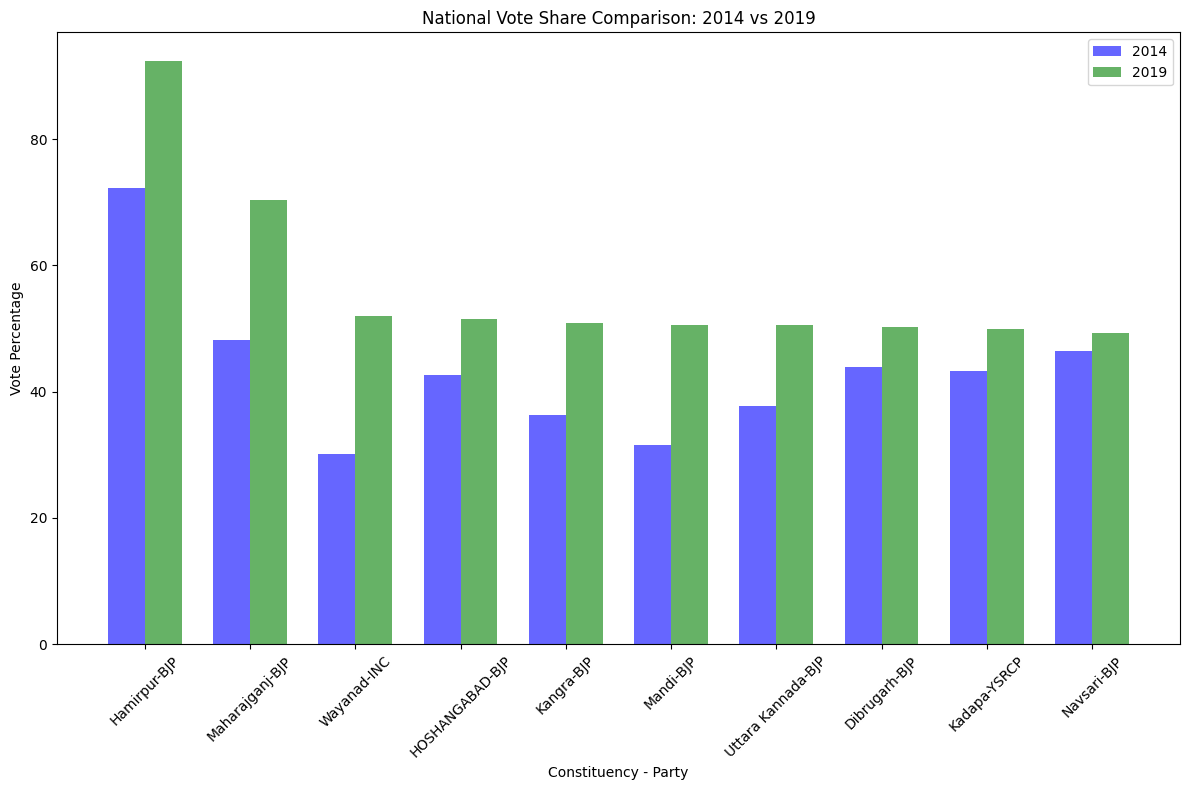

In [10]:
# Function to find the top party for each pc_name
def get_top_party(df):
    grouped = df.groupby(['pc_name', 'party']).agg({'total_votes': 'sum', 'total_electors': 'first'}).reset_index()
    sorted_grouped = grouped.sort_values(by=['pc_name', 'total_votes'], ascending=[True, False])
    top_parties = sorted_grouped.drop_duplicates(subset='pc_name', keep='first').reset_index(drop=True)
    return top_parties[['pc_name', 'party', 'total_votes', 'total_electors']]

# Get the top party for 2014
top_party_2014 = get_top_party(result_2014)
top_party_2014 =  top_party_2014.rename(columns={'party': 'party_2014', 'total_votes': 'total_votes_2014', 'total_electors': 'total_electors_2014'})
# Get the top party for 2019
top_party_2019 = get_top_party(result_2019)
top_party_2019 = top_party_2019.rename(columns={'party': 'party_2019', 'total_votes': 'total_votes_2019', 'total_electors': 'total_electors_2019'})

# Merge the results
merged_top_parties = pd.merge(top_party_2014, top_party_2019, on='pc_name')

# Filter the pc_name where the top party is the same in both years
same_top_party = merged_top_parties[merged_top_parties['party_2014'] == merged_top_parties['party_2019']]

# Calculate the percentage of votes for the winning party in 2019
same_top_party['percentage_votes_2019'] = (same_top_party['total_votes_2019'] / same_top_party['total_electors_2019']) * 100

# Sort by the percentage of votes in 2019 in descending order
ranked_same_top_party = same_top_party.sort_values(by='percentage_votes_2019', ascending=False)

print(ranked_same_top_party)

ranked_same_top_party = ranked_same_top_party.head(10)

plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(ranked_same_top_party))

# Bar chart for 2014 and 201
plt.bar(index, ranked_same_top_party['total_votes_2014']/ranked_same_top_party['total_electors_2014']*100, bar_width, label='2014', color='b', alpha=0.6)
plt.bar([i + bar_width for i in index], ranked_same_top_party['total_votes_2019']/ranked_same_top_party['total_electors_2019']*100, bar_width, label='2019', color='g', alpha=0.6)

# Labels and title
plt.xlabel('Constituency - Party')
plt.ylabel('Vote Percentage')
plt.title('National Vote Share Comparison: 2014 vs 2019')
plt.xticks([i + bar_width/2 for i in index], (ranked_same_top_party['pc_name']+"-"+ranked_same_top_party['party_2014']),rotation=45)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


Which constituencies have voted for different parties in two elections (list top 10 based on the difference (2019-2014) in winner vote percentage in the two elections)?

To answer this question, we'll follow these steps:

Identify the party with the highest total votes for each pc_name in both 2014 and 2019 datasets.
Calculate the percentage of votes for the winning party in each year.
Find constituencies where the winning party changed between 2014 and 2019.
Calculate the difference in winner vote percentage between 2019 and 2014.
List the top 10 constituencies based on the difference in winner vote percentage.

                 pc_name party_2014 party_2019  percentage_2014  \
13           Alipurduars       AITC        BJP         0.246414   
41   Autonomous District        INC        BJP         0.303536   
382           Puducherry      AINRC        INC         0.283823   
245        Kanniyakumari        BJP        INC         0.254058   
115        Chikkballapur        INC        BJP         0.256149   
266                Kolar        INC        BJP         0.280598   
418              Sambhal        BJP         SP         0.212754   
308               Mandya      JD(S)        IND         0.314133   
451               Supaul        INC      JD(U)         0.218229   
176              Giridih        BJP      AJSUP         0.259263   

     percentage_2019  percentage_difference  
13          0.455479               0.209065  
41          0.479073               0.175537  
382         0.457136               0.173313  
245         0.417808               0.163750  
115         0.412384            

C:\Users\madhan\AppData\Local\Temp\ipykernel_16188\3447763056.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_top_party['percentage_2014'] = different_top_party['total_votes_2014']/different_top_party['total_electors_2014']
C:\Users\madhan\AppData\Local\Temp\ipykernel_16188\3447763056.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_top_party['percentage_2019'] = different_top_party['total_votes_2019']/different_top_party['total_electors_2019']
C:\Users\madhan\AppData\Local\Temp

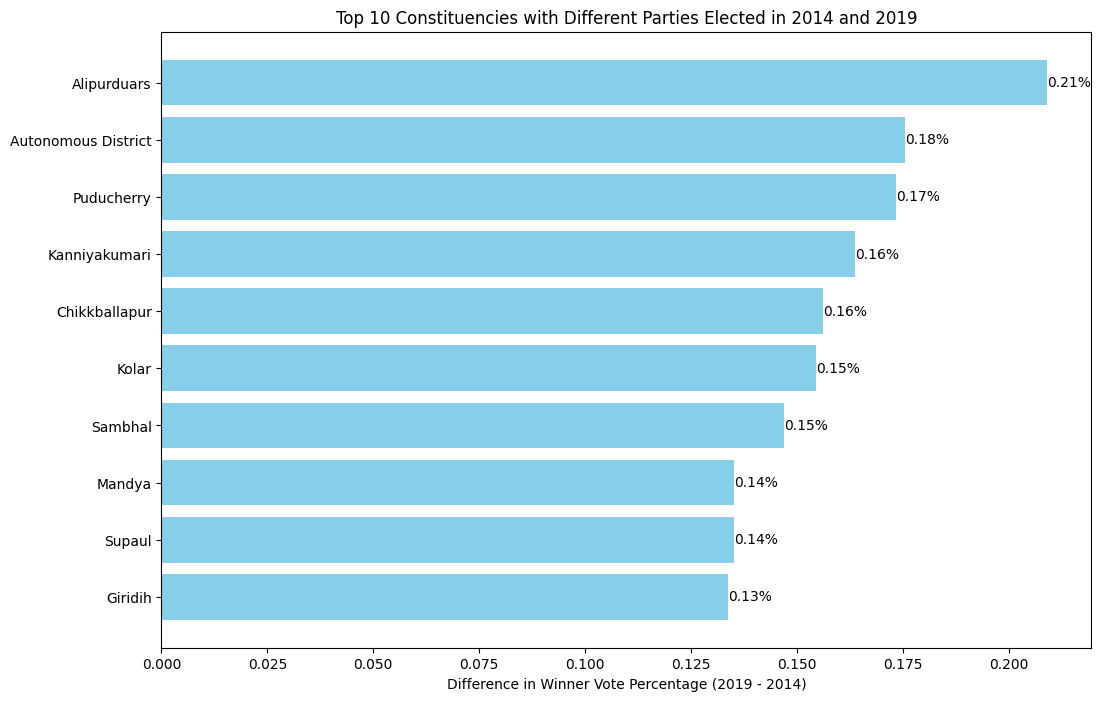

In [11]:
def get_top_party(df):
    grouped = df.groupby(['pc_name', 'party']).agg({'total_votes': 'sum', 'total_electors': 'first'}).reset_index()
    sorted_grouped = grouped.sort_values(by=['pc_name', 'total_votes'], ascending=[True, False])
    top_parties = sorted_grouped.drop_duplicates(subset='pc_name', keep='first').reset_index(drop=True)
    return top_parties[['pc_name', 'party', 'total_votes', 'total_electors']]

top_party_2014 = get_top_party(result_2014)
top_party_2014 =top_party_2014.rename(columns={'party' : 'party_2014','total_votes':'total_votes_2014','total_electors':'total_electors_2014'})


top_party_2019 = get_top_party(result_2019)
top_party_2019 = top_party_2019.rename(columns={'party': 'party_2019','total_votes':'total_votes_2019','total_electors':'total_electors_2019'})

merged_top_parties = pd.merge(top_party_2014,top_party_2019, on='pc_name')

different_top_party = merged_top_parties[merged_top_parties['party_2014'] != merged_top_parties['party_2019']]

different_top_party['percentage_2014'] = different_top_party['total_votes_2014']/different_top_party['total_electors_2014']
different_top_party['percentage_2019'] = different_top_party['total_votes_2019']/different_top_party['total_electors_2019']


different_top_party['percentage_difference'] =different_top_party['percentage_2019']-different_top_party['percentage_2014']

top_10_different_top_party = different_top_party.sort_values(by='percentage_difference', ascending=False).head(10)

print(top_10_different_top_party[['pc_name', 'party_2014', 'party_2019', 'percentage_2014', 'percentage_2019', 'percentage_difference']])
plt.figure(figsize=(12, 8))
plt.barh(top_10_different_top_party['pc_name'], top_10_different_top_party['percentage_difference'], color='skyblue')
plt.xlabel('Difference in Winner Vote Percentage (2019 - 2014)')
plt.title('Top 10 Constituencies with Different Parties Elected in 2014 and 2019')
plt.gca().invert_yaxis()  

for index, value in enumerate(top_10_different_top_party['percentage_difference']):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.show()

Top 5 candidates based on margin difference with runners in 2014 and 2019.

To answer this question, we'll follow these steps:

Identify the top two candidates in terms of total votes for each pc_name in both 2014 and 2019 datasets.
Calculate the margin of votes between the winner and the runner-up for each pc_name.
Calculate the difference in the margin between 2014 and 2019 for each candidate.
List the top 5 candidates based on the margin difference.

In [12]:
def get_top_two_candidates(df):
    grouped = df.groupby('pc_name').apply(lambda x: x.nlargest(2, 'total_votes')).reset_index(drop=True)
    return grouped[['pc_name', 'candidate', 'total_votes']]

# Get the top two candidates for 2014
top_two_2014 = get_top_two_candidates(result_2014)

# Get the top two candidates for 2019
top_two_2019 = get_top_two_candidates(result_2019)

# Function to calculate the margin of votes between the winner and the runner-up
def calculate_margin(df):
    df['margin'] = df.groupby('pc_name')['total_votes'].diff().abs()
    return df.dropna(subset=['margin'])

# Calculate the margin for 2014
margin_2014 = calculate_margin(top_two_2014)
margin_2014 = margin_2014.rename(columns={'candidate': 'candidate_2014', 'total_votes': 'total_votes_2014', 'margin': 'margin_2014'})

# Calculate the margin for 2019
margin_2019 = calculate_margin(top_two_2019)
margin_2019 = margin_2019.rename(columns={'candidate': 'candidate_2019', 'total_votes': 'total_votes_2019', 'margin': 'margin_2019'})

# Merge the results based on pc_name
merged_margins = pd.merge(margin_2014, margin_2019, on='pc_name')

# Calculate the difference in margins
merged_margins['margin_difference'] = merged_margins['margin_2019'] - merged_margins['margin_2014']

# Sort by the margin difference in descending order and select the top 5
top_5_candidates = merged_margins.sort_values(by='margin_difference', ascending=False).head(5)

top_5_candidates[['pc_name', 'candidate_2014', 'candidate_2019', 'margin_2014', 'margin_2019', 'margin_difference']]

C:\Users\madhan\AppData\Local\Temp\ipykernel_16188\3707502848.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('pc_name').apply(lambda x: x.nlargest(2, 'total_votes')).reset_index(drop=True)
C:\Users\madhan\AppData\Local\Temp\ipykernel_16188\3707502848.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('pc_name').apply(lambda x: x.nlargest(2, 'total_votes')).res

,pc_name,candidate_2014,candidate_2019,margin_2014,margin_2019,margin_difference
335,NORTH WEST DELHI,RAKHI BIRLA,GUGAN SINGH,106802.0,553897.0,447095.0
296,Madhubani,ABDUL BARI SIDDIQUI,BADRI KUMAR PURBEY,20535.0,454940.0,434405.0
143,Dindigul,GANDHIRAJAN S,"JOTHIMUTHU, K.",127845.0,538972.0,411127.0
500,Wayanad,SATHYAN MOKERI,P.P. Suneer,20870.0,431770.0,410900.0
449,Sriperumbudur,"JAGATHRAKSHAKAN, S. THIRU",Vaithilingam A,102646.0,507955.0,405309.0


% Split of votes of parties between 2014 vs 2019 at national level

To answer this question, we'll follow these steps:

Calculate the total votes for each party at the national level for both 2014 and 2019.
Calculate the percentage of votes each party received out of the total votes for each year.
Compare the percentage split of votes between 2014 and 2019.

    party  percentage_2014  percentage_2019
168   BJP        30.969622        37.298440
329   INC        18.584291        19.456285
225   BSP         4.314084         3.622189
61   AITC         4.079790         4.059009
771    SP         3.583059         2.547688
..    ...              ...              ...
268  DKSP         0.000000         0.000056
827   ToP         0.000000         0.000054
259  CoAP         0.000000         0.000045
267  DJHP         0.000000         0.000044
474  MLJK         0.000000         0.000043

[899 rows x 3 columns]


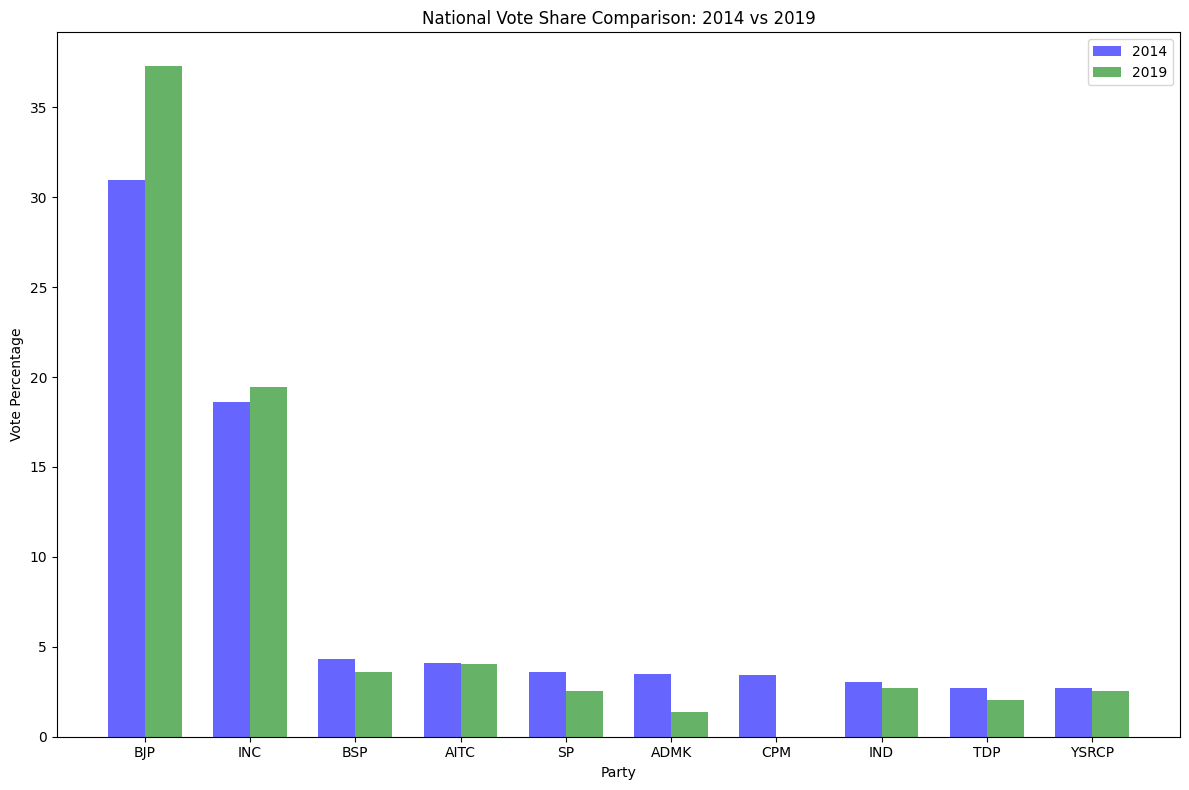

In [13]:
# Calculate the total votes for each party in 2014
total_votes_2014 = result_2014.groupby('party')['total_votes'].sum().reset_index()

# Calculate the total votes for each party in 2019
total_votes_2019 = result_2019.groupby('party')['total_votes'].sum().reset_index()

# Calculate the total votes cast in 2014 and 2019
total_votes_cast_2014 = total_votes_2014['total_votes'].sum()
total_votes_cast_2019 = total_votes_2019['total_votes'].sum()

# Calculate the percentage of votes for each party in 2014
total_votes_2014['percentage_2014'] = (total_votes_2014['total_votes'] / total_votes_cast_2014) * 100

# Calculate the percentage of votes for each party in 2019
total_votes_2019['percentage_2019'] = (total_votes_2019['total_votes'] / total_votes_cast_2019) * 100

# Merge the results on party
merged_votes = pd.merge(total_votes_2014, total_votes_2019, on='party', how='outer').fillna(0)


# Select relevant columns
merged_votes = merged_votes[['party', 'percentage_2014', 'percentage_2019']]

merged_votes.sort_values(by=['percentage_2014', 'percentage_2019'], ascending=False, inplace=True)

print(merged_votes)

merged_votes = merged_votes.head(10)

plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(merged_votes))

# Bar chart for 2014 and 2019
plt.bar(index, merged_votes['percentage_2014'], bar_width, label='2014', color='b', alpha=0.6)
plt.bar([i + bar_width for i in index], merged_votes['percentage_2019'], bar_width, label='2019', color='g', alpha=0.6)

# Labels and title
plt.xlabel('Party')
plt.ylabel('Vote Percentage')
plt.title('National Vote Share Comparison: 2014 vs 2019')
plt.xticks([i + bar_width/2 for i in index], merged_votes['party'])
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

% Split of votes of parties between 2014 vs 2019 at state level

To answer this question, we'll follow these steps:

Calculate the total votes for each party at the state level for both 2014 and 2019.
Calculate the percentage of votes each party received out of the total votes for each state for each year.
Compare the percentage split of votes between 2014 and 2019 for each state.

In [14]:
# Calculate the total votes for each party in each state in 2014
total_votes_state_2014 = result_2014.groupby(['state', 'party'])['total_votes'].sum().reset_index()

# Calculate the total votes for each party in each state in 2019
total_votes_state_2019 = result_2019.groupby(['state', 'party'])['total_votes'].sum().reset_index()

# Calculate the total votes cast in each state in 2014 and 2019
total_votes_cast_state_2014 = result_2014.groupby('state')['total_votes'].sum().reset_index()
total_votes_cast_state_2019 = result_2019.groupby('state')['total_votes'].sum().reset_index()

# Merge total votes cast with party votes to calculate percentages
total_votes_state_2014 = total_votes_state_2014.merge(total_votes_cast_state_2014, on='state', suffixes=('', '_total'))
total_votes_state_2019 = total_votes_state_2019.merge(total_votes_cast_state_2019, on='state', suffixes=('', '_total'))

# Calculate the percentage of votes for each party in each state in 2014
total_votes_state_2014['percentage_2014'] = (total_votes_state_2014['total_votes'] / total_votes_state_2014['total_votes_total']) * 100

# Calculate the percentage of votes for each party in each state in 2019
total_votes_state_2019['percentage_2019'] = (total_votes_state_2019['total_votes'] / total_votes_state_2019['total_votes_total']) * 100

# Merge the results on state and party
merged_votes_state = pd.merge(total_votes_state_2014, total_votes_state_2019, on=['state', 'party'], how='outer').fillna(0)

# Select relevant columns
merged_votes_state = merged_votes_state[['state', 'party', 'percentage_2014', 'percentage_2019']]
merged_votes_state.sort_values(by=['percentage_2014', 'percentage_2019'], ascending=False, inplace=True)
merged_votes_state


,state,party,percentage_2014,percentage_2019
1183,Nagaland,NPF,68.665428,0.000000
1534,Tripura,CPM,64.009163,0.000000
420,Gujarat,BJP,59.050655,62.207886
1846,Uttarakhand,BJP,55.322378,61.013396
1322,Rajasthan,BJP,54.941915,58.470314
...,...,...,...,...
1639,Uttar Pradesh,BaJD,0.000000,0.000565
1595,Uttar Pradesh,BDPty,0.000000,0.000546
1824,Uttar Pradesh,UDFS,0.000000,0.000521
975,Maharashtra,DJHP,0.000000,0.000505


Which constituency has voted the most for NOTA?

Constituency with the highest NOTA votes:
state                  Andhra Pradesh
pc_name                        Aruku 
candidate                        NOTA
sex                               NaN
age                               NaN
category                          NaN
party                            NOTA
party_symbol                      NaN
general_votes                   47955
postal_votes                       22
total_votes                     47977
total_electors                1451418
voter_turnout_count          0.033055
percentage_votes             3.305526
Name: 10, dtype: object


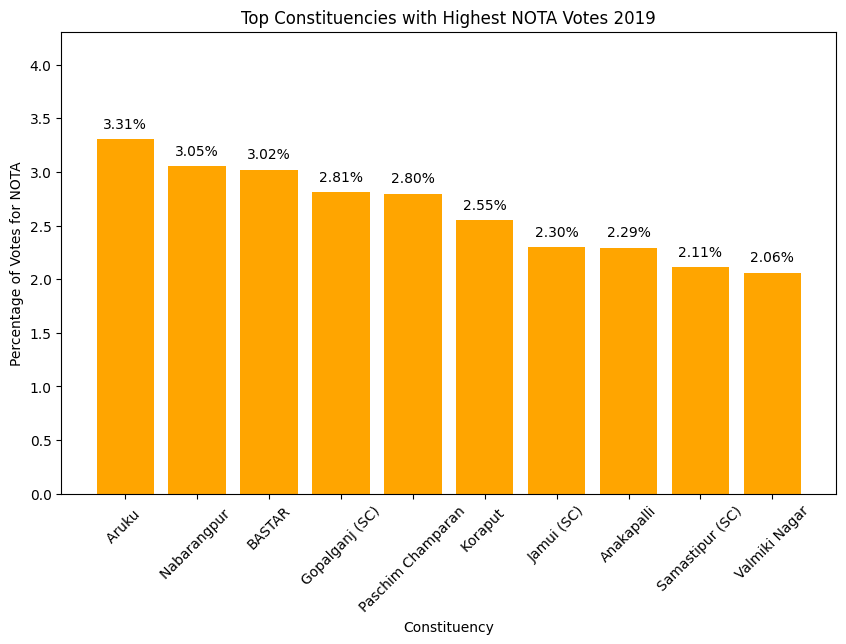

In [15]:
# Calculate the percentage of votes for NOTA
result_2019['percentage_votes'] = result_2019['total_votes'] / result_2019['total_electors'] * 100

# Filter the data to include only NOTA rows
nota_votes = result_2019[result_2019['party'] == 'NOTA']

# Sort by percentage of votes in descending order
sorted_nota_votes = nota_votes.sort_values(by='percentage_votes', ascending=False).head(10)

# Select the constituency with the highest percentage of NOTA votes
top_nota_constituency = sorted_nota_votes.iloc[0]

print("Constituency with the highest NOTA votes:")
print(top_nota_constituency)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_nota_votes['pc_name'], sorted_nota_votes['percentage_votes'], color='orange')
plt.xlabel('Constituency')
plt.xticks(rotation=45)
plt.ylabel('Percentage of Votes for NOTA')
plt.title('Top Constituencies with Highest NOTA Votes 2019')
plt.ylim(0, max(sorted_nota_votes['percentage_votes']) + 1)

# Adding vote percentage labels to the bars
for i in range(len(sorted_nota_votes)):
    plt.text(i, sorted_nota_votes['percentage_votes'].iloc[i] + 0.1, f'{sorted_nota_votes["percentage_votes"].iloc[i]:.2f}%', ha='center')

plt.show()

Constituency with the highest NOTA votes:
state                         Tamil Nadu
pc_name                        Nilgiris 
candidate              None of the Above
sex                                    M
age                                  NaN
category                             NaN
party                               NOTA
party_symbol                        NOTA
general_votes                      46495
postal_votes                          64
total_votes                        46559
total_electors                   1269173
voter_turnout_count             0.036685
percentage_votes                3.668452
Name: 5416, dtype: object


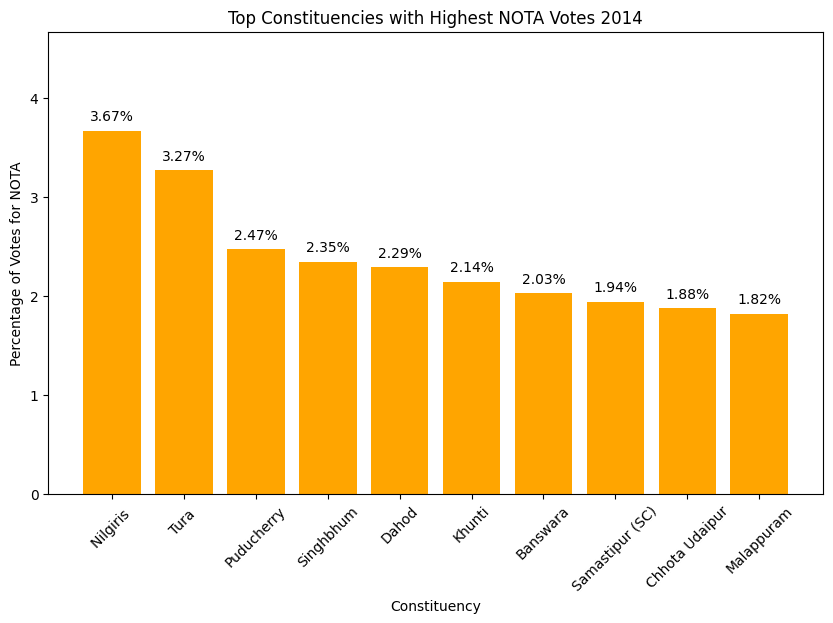

In [16]:
# Calculate the percentage of votes for NOTA
result_2014['percentage_votes'] = result_2014['total_votes'] / result_2014['total_electors'] * 100

# Filter the data to include only NOTA rows
nota_votes = result_2014[result_2014['party'] == 'NOTA']

# Sort by percentage of votes in descending order
sorted_nota_votes = nota_votes.sort_values(by='percentage_votes', ascending=False).head(10)

# Select the constituency with the highest percentage of NOTA votes
top_nota_constituency = sorted_nota_votes.iloc[0]

print("Constituency with the highest NOTA votes:")
print(top_nota_constituency)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_nota_votes['pc_name'], sorted_nota_votes['percentage_votes'], color='orange')
plt.xlabel('Constituency')
plt.xticks(rotation=45)
plt.ylabel('Percentage of Votes for NOTA')
plt.title('Top Constituencies with Highest NOTA Votes 2014')
plt.ylim(0, max(sorted_nota_votes['percentage_votes']) + 1)

# Adding vote percentage labels to the bars
for i in range(len(sorted_nota_votes)):
    plt.text(i, sorted_nota_votes['percentage_votes'].iloc[i] + 0.1, f'{sorted_nota_votes["percentage_votes"].iloc[i]:.2f}%', ha='center')

plt.show()

Which constituencies have elected candidates whose party has less than 10% vote share at the state level in 2019?

To answer this question, we need to follow these steps:

Calculate the vote share for each party at the state level in 2019.
Identify the constituencies where the elected candidates belong to parties with less than 10% vote share at the state level.

In [17]:
# Calculate the total votes for each party at the state level in 2019
total_votes_state_2019 = result_2019.groupby(['state', 'party'])['total_votes'].sum().reset_index()

# Calculate the total votes cast in each state in 2019
total_votes_cast_state_2019 = result_2019.groupby('state')['total_votes'].sum().reset_index()

# Merge total votes cast with party votes to calculate percentages
total_votes_state_2019 = total_votes_state_2019.merge(total_votes_cast_state_2019, on='state', suffixes=('', '_total'))

# Calculate the percentage of votes for each party in each state in 2019
total_votes_state_2019['percentage_2019'] = (total_votes_state_2019['total_votes'] / total_votes_state_2019['total_votes_total']) * 100

# Filter parties with less than 10% vote share at state level
parties_less_than_10 = total_votes_state_2019[total_votes_state_2019['percentage_2019'] < 10]

# Get the list of parties with less than 10% vote share
parties_list = parties_less_than_10['party'].unique()

# Identify constituencies where elected candidates belong to these parties
elected_candidates_2019 = result_2019.loc[result_2019.groupby('pc_name')['total_votes'].idxmax()]

# Filter constituencies with parties having less than 10% vote share
filtered_constituencies = elected_candidates_2019[elected_candidates_2019['party'].isin(parties_list)]

print("Constituencies where elected candidates belong to parties with less than 10% vote share at state level in 2019:")
filtered_constituencies[['state', 'pc_name', 'candidate', 'party', 'total_votes']]

Constituencies where elected candidates belong to parties with less than 10% vote share at state level in 2019:


,state,pc_name,candidate,party,total_votes
354,Arunachal Pradesh,ARUNACHAL EAST,Tapir Gao,BJP,153883
344,Arunachal Pradesh,ARUNACHAL WEST,KIREN RIJIJU,BJP,225796
7872,Telangana,Adilabad,SOYAM BAPU RAO,BJP,377374
6038,Uttar Pradesh,Agra,Satyapal Singh Baghel,BJP,646875
3877,Maharashtra,Ahmadnagar,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,BJP,704660
...,...,...,...,...,...
5643,Tamil Nadu,Virudhunagar,"MANICKAM TAGORE, B.",INC,470883
8519,NCT OF Delhi,WEST DELHI,PARVESH SAHIB SINGH VERMA,BJP,865648
3302,Maharashtra,Wardha,Ramdas Chandrabhanji Tadas,BJP,578364
2505,Kerala,Wayanad,Rahul Gandhi,INC,706367


Is there a correlation between postal votes % and voter turnout %?

To answer this question, we need to follow these steps:

Calculate the postal votes percentage and voter turnout percentage for each constituency.
Calculate the correlation between postal votes % and voter turnout %.
Visualize the relationship using a scatter plot.

Correlation between postal votes % and voter turnout %: 0.03
P-value: 0.00


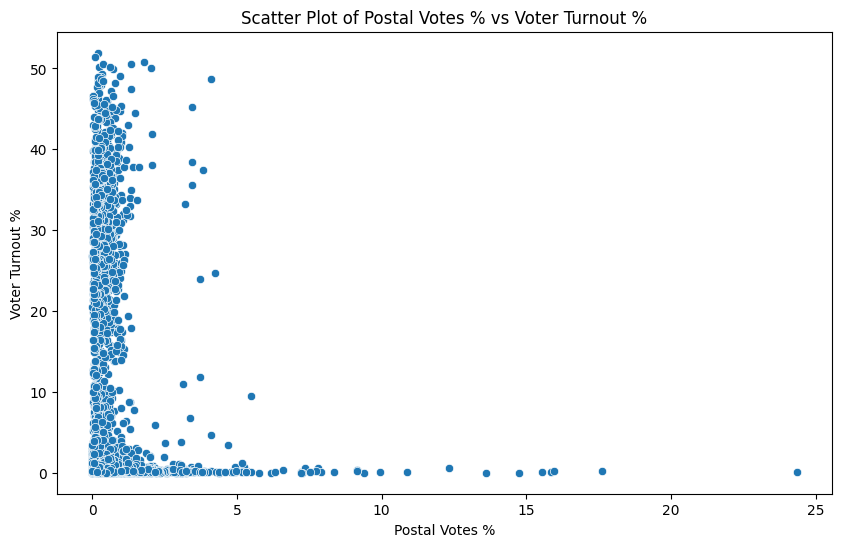

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


result_2019['postal_votes_percentage'] = result_2019['postal_votes'] / result_2019['total_votes'] * 100
result_2019['voter_turnout_percentage'] = result_2019['total_votes'] / result_2019['total_electors'] * 100

# Calculate the correlation
correlation, p_value = pearsonr(result_2019['postal_votes_percentage'], result_2019['voter_turnout_percentage'])

print(f'Correlation between postal votes % and voter turnout %: {correlation:.2f}')
print(f'P-value: {p_value:.2f}')

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='postal_votes_percentage', y='voter_turnout_percentage', data=result_2019)
plt.title('Scatter Plot of Postal Votes % vs Voter Turnout %')
plt.xlabel('Postal Votes %')
plt.ylabel('Voter Turnout %')
plt.show()

Gender Split (Count):
sex
M    7209
F     630
O       6
Name: count, dtype: int64

Gender Split (Percentage):
sex
M    91.892925
F     8.030593
O     0.076482
Name: count, dtype: float64


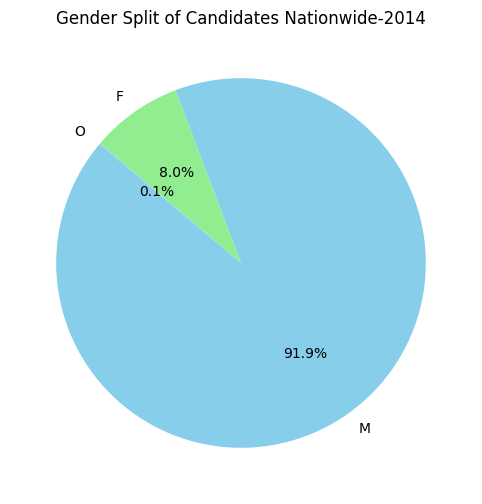

In [22]:
gender_split = result_2014['sex'].value_counts()

# Calculate the percentages
total_candidates = gender_split.sum()
gender_split_percentage = (gender_split / total_candidates) * 100

print("Gender Split (Count):")
print(gender_split)

print("\nGender Split (Percentage):")
print(gender_split_percentage)

# Plotting the gender split
plt.figure(figsize=(8, 6))
gender_split_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Gender Split of Candidates Nationwide-2014')
plt.ylabel('')  # Hide the y-label for better visual
plt.show()

In [23]:
gender_counts = result_2019.groupby(['state', 'sex']).size().unstack(fill_value=0)
# print(gender_counts)
# Calculate the women-to-men ratio for each state
gender_counts['women_to_men_ratio'] = gender_counts['FEMALE'] / gender_counts['MALE']

# Find the state with the highest and lowest women-to-men ratio
highest_ratio_state = gender_counts['women_to_men_ratio'].idxmax()
lowest_ratio_state = gender_counts['women_to_men_ratio'].idxmin()

print("State with the highest women-to-men ratio:")
print(gender_counts.loc[highest_ratio_state])

print("\nState with the lowest women-to-men ratio:")
print(gender_counts.loc[lowest_ratio_state])

State with the highest women-to-men ratio:
sex
FEMALE                 9.000000
MALE                  27.000000
THIRD                  0.000000
women_to_men_ratio     0.333333
Name: Chandigarh, dtype: float64

State with the lowest women-to-men ratio:
sex
FEMALE                0.0
MALE                  4.0
THIRD                 0.0
women_to_men_ratio    0.0
Name: Daman & Diu, dtype: float64


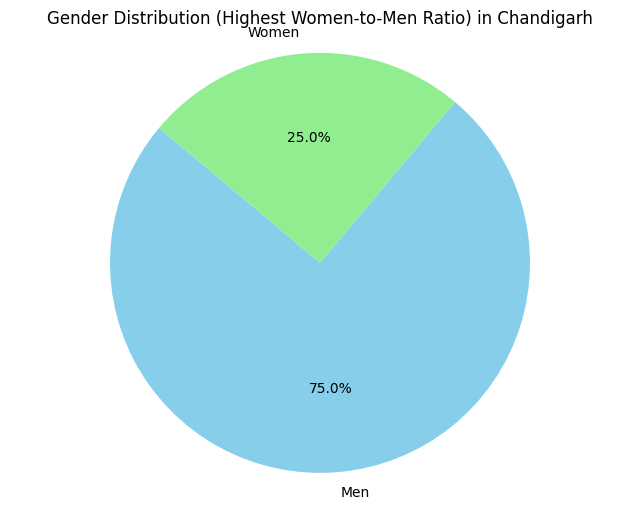

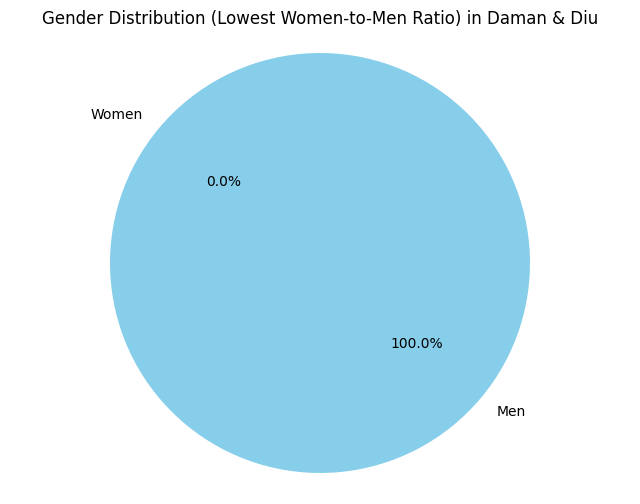

In [24]:
def plot_pie_chart(data, state_name, title):
    labels = ['Men', 'Women']
    sizes = [data['MALE'], data['FEMALE']]
    colors = ['skyblue', 'lightgreen']
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'{title} in {state_name}')
    plt.axis('equal')
    plt.show()

# Plot pie chart for the state with the highest women-to-men ratio
plot_pie_chart(gender_counts.loc[highest_ratio_state], highest_ratio_state, 'Gender Distribution (Highest Women-to-Men Ratio)')

# Plot pie chart for the state with the lowest women-to-men ratio
plot_pie_chart(gender_counts.loc[lowest_ratio_state], lowest_ratio_state, 'Gender Distribution (Lowest Women-to-Men Ratio)')